## New Oil Presence Notebook

First figure request for Stephanie


In [81]:
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as mcm
import numpy as np
from scipy.ndimage.filters import gaussian_filter
import xarray as xr

%matplotlib inline

In [132]:
landcolour = 'papayawhip'
plt.rcParams['font.size'] = 15

In [133]:
minoil = 3 # litres per grid cell

In [7]:
#mesh = xr.open_dataset('~/MEOPAR/grid/mesh_mask201702.nc')
mesh = xr.open_dataset('/home/sallen/Documents/MEOPAR/grid/mesh_mask201702.nc')
tmask = 1- mesh.tmask[0, 0]

In [6]:
#data3d = xr.open_dataset('/data/sallen/results/MIDOSS/Monte_Carlo/first240_oilpresence.nc')
data3d = xr.open_dataset('~/Documents/MIDOSS/MIDOSS_aggregated_merged.nc')

In [113]:
jmin, jmax = data3d.x.values[0]+1, data3d.x.values[-1]+2
imin, imax = data3d.y.values[0]+1, data3d.y.values[-1]+2

In [31]:
raw = data3d.OilWaterColumnOilVol_surface_presence

WaterColumnOilVol_surface_presence.values is the maximum value in time at the surface at a given i, j for a given run.

In [134]:
#oil = np.zeros_like(raw.values[0])
oil_array = (raw > minoil/1000.).astype(int).mean(axis=0)
print (oil_array.max())
oil = np.ma.masked_array(oil_array, oil_array < 0.01)  #mask anything less than 1%
print (oil.mask.min())

<xarray.DataArray 'OilWaterColumnOilVol_surface_presence' ()>
array(0.15767635)
False


(270, 240) (270, 240)


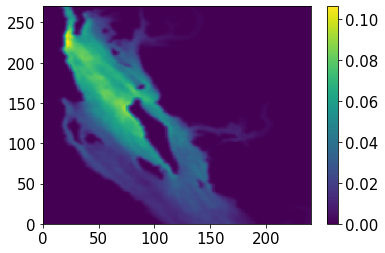

In [128]:
sigma = 1.5
#data2 = scipy.ndimage.gaussian_filter(oil * (1-oil.mask), sigma=sigma)
#data2 /= scipy.ndimage.gaussian_filter(1-oil.mask, sigma=sigma)
#data2[np.logical_not(1-oil.mask)] = 0

smooth = scipy.ndimage.gaussian_filter(oil, sigma=sigma)
print (smooth.shape, oil.shape)
plt.pcolormesh(smooth)
plt.colorbar();

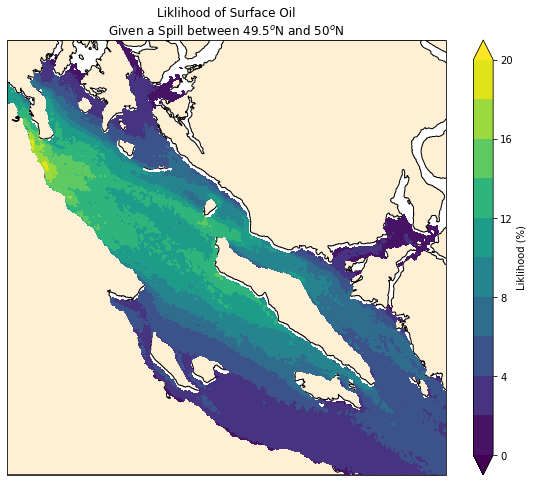

In [56]:
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-125.3, -123.9], [49.3, 50.2]
ax = plt.axes(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
C = ax.contourf(
    mesh.nav_lon[imin:imax, jmin:jmax], mesh.nav_lat[imin:imax, jmin:jmax], oil*100, np.arange(0, 0.22, 0.02)*100,
    extend='both', transform=crs.PlateCarree(), zorder=2,
)
cb = fig.colorbar(C, ax=ax);
cb.set_label('Liklihood (%)')
ax.set_title("Liklihood of Surface Oil\nGiven a Spill between 49.5$^o$N and 50$^o$N");
fig.savefig('Probability_1A_contour.png')

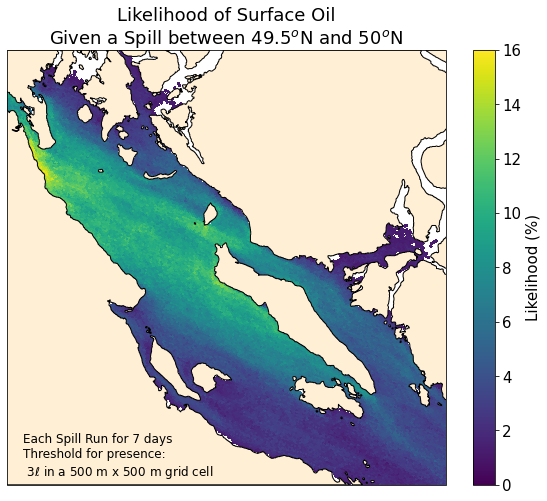

In [136]:
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-125.3, -123.9], [49.3, 50.2]
ax = plt.axes(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
C = ax.pcolormesh(
    mesh.nav_lon[imin:imax, jmin:jmax], mesh.nav_lat[imin:imax, jmin:jmax], oil*100, vmax=16, vmin=0,
    transform=crs.PlateCarree(), zorder=0,
)
cb = fig.colorbar(C, ax=ax);
#cb.add_lines(cont)
cb.set_label('Likelihood (%)')
ax.set_title("Likelihood of Surface Oil\nGiven a Spill between 49.5$^o$N and 50$^o$N");
ax.text(-125.25, 49.32, f'Each Spill Run for 7 days\nThreshold for presence:\n {minoil}$\ell$ in a 500 m x 500 m grid cell',
       transform=crs.PlateCarree(), fontsize=12)
fig.savefig('Probability_1A_pcolor_bigger_3.png', dpi=200)